# Papers Analysis


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Setting `matplotlib` parameters


In [3]:
plt.rcParams["figure.figsize"] = [12, 6]

Read the data


In [4]:
df_paper = pd.read_csv("paper.csv")
df_nep = pd.read_csv("nep.csv")
df_nep_inclusion = pd.read_csv("nep_inclusion.csv")
df_nep_issue = pd.read_csv("nep_issue.csv")
df_authorship = pd.read_csv("authorship.csv")

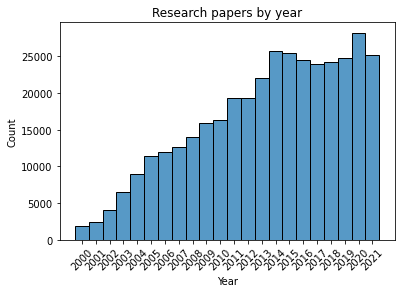

In [31]:
min_year = 2000
max_year = 2021
sns.histplot(data = df_paper.year[df_paper.year.between(min_year, max_year)], discrete = 1)
plt.title("Research papers by year")
plt.xlabel("Year")
plt.xticks(range(min_year, max_year + 1, 1), rotation = 45)
plt.show()

In [41]:
(pd.DataFrame(df_paper.groupby('institution')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.head(10)
.style.set_caption("Top 10 institutions by published papers")
)

,count
institution,
"University Library of Munich, Germany",30185
"National Bureau of Economic Research, Inc",19925
Institute of Labor Economics (IZA),14141
HAL,11489
C.E.P.R. Discussion Papers,10720
arXiv.org,9264
Agricultural and Applied Economics Association,5118
The World Bank,4689
CESifo,4023


In [60]:
df_pa = df_paper.merge(df_authorship, left_on='pid', right_on='paper__pid', how='left')
df_pa.author__aid = df_pa.author__aid.str.replace(':', ' ').str.title()

In [62]:
(pd.DataFrame(df_pa.groupby('author__aid')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.head(10)
.style.set_caption("Top 10 authors by published papers")
)

,count
author__aid,
Asongu Simplice,1489
Fund International Monetary,903
Bank World,828
Gupta Rangan,756
Mcaleer Michael,648
Oecd,466
Tol Richard,385
Odhiambo Nicholas,330
Chang Chia-Lin,306


In [98]:
num_authors = (pd.DataFrame(df_pa.groupby('pid')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.value_counts()
)

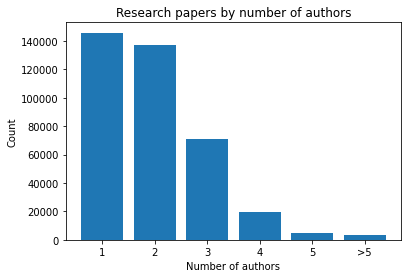

In [97]:
num_top = 5
height = list(num_authors[:num_top].values) + [num_authors[num_top:].sum()]
bars = list(range(1, num_top + 1)) + [f'>{num_top}']
y_pos = range(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Research papers by number of authors")
plt.xlabel("Number of authors")
plt.ylabel("Count")
plt.show()

In [114]:
pd.DataFrame(df_pa.groupby('author__aid')
.institution
.nunique()
.sort_values(ascending = False)
.head(10)
).style.set_caption('Top 10 authors affilieated with the most institution')

,institution
author__aid,
Ongena Steven,47
Peri Giovanni,40
Ottaviano Gianmarco,39
Eichengreen Barry,39
Devereux Michael,39
Clark Andrew,37
Verdier Thierry,37
Pesaran M,37
Cabrales Antonio,36
